In [1]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D, offset_copy

In [2]:
def rainbox_text(
    x, y, strings, colors, orientation="horizontal", ax=None, **kwargs
):
    """
    Take a list of *strings* and *colors* and place them next to each
    other, with text strings[i] being shown in colors[i].
    
    Parameters
    ----------
    x, y : float
        Text position in data coordinates.
    strings : list of str
        The strings to draw.
    colors : list of color
        The colors to use.
    orientation : {'horizontal', 'vertical'}
    ax : Axes, optional
        The Axes to draw into. If None, the current axes will be used.
    **kwargs
        All other keyword arguments are passed to plt.text(), so you can
        set the font size, family, etc.
    """
    if ax is None:
        ax = plt.gca()
    
    t = ax.transData
    fig = ax.figure
    canvas = fig.canvas
    
    assert orientation in ["horizontal", "vertical"]
    if orientation == "vertical":
        kwargs.update(rotation=90, va="bottom")
    
    for s, c in zip(strings, colors):
        text = ax.text(x, y, s + " ", color=c, transform=t, **kwargs)
        
        # need to draw to update the text position
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        # convert window extent from pixels to inches
        # to avoid issues displaying at different dpi
        ex = fig.dpi_scale_trans.inverted().transform_bbox(ex)
        
        if orientation == "horizontal":
            t = text.get_transform() + offset_copy(Affine2D(), fig=fig, x=ex.width, y=0)
        else:
            t = text.get_transform() + offset_copy(Affine2D(), fig=fig, x=0, y=ex.height)

In [3]:
words = "all unicorns poop rainbows ! ! !".split()
colors = [
    "red", "orange", "gold", "lawngreen",
    "lightseagreen", "royalblue", "blueviolet",
]

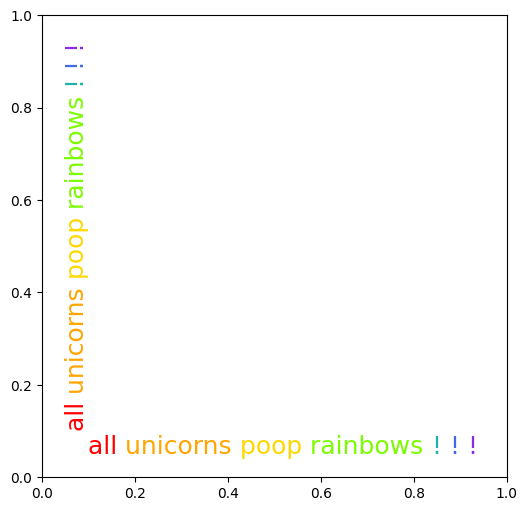

In [4]:
plt.figure(figsize=(6, 6))
rainbox_text(0.1, 0.05, words, colors, size=18)
rainbox_text(0.05, 0.1, words, colors, orientation="vertical", size=18)
plt.show()